In [1]:
import os
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_excel(path):
    return pd.read_excel(path)
    
def days_in_month(year, month):
    return calendar.monthrange(year, month)[1]

In [3]:
file = 'balonggandu_2023'
path = 'Data Balonggandu/2023'
path_1 = '../Data/Preprocessing/' + path + '/2_input_' + file + '.xlsx'

df = read_excel(path_1)
df.head()

,WAKTU,TAHUN,BULAN,PEKAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,JUMLAH,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023-01-01 00:00:00,2023,1,1,1,Sunday,00:00,103,25,14,142,82.4,25,35.0,142
1,2023-01-01 00:15:00,2023,1,1,1,Sunday,00:15,111,16,12,139,88.8,16,30.0,135
2,2023-01-01 00:30:00,2023,1,1,1,Sunday,00:30,114,26,6,146,91.2,26,15.0,132
3,2023-01-01 00:45:00,2023,1,1,1,Sunday,00:45,76,24,11,111,60.8,24,27.5,112
4,2023-01-01 01:00:00,2023,1,1,1,Sunday,01:00,73,24,7,104,58.4,24,17.5,100


In [4]:
df['SMP'] = df['SMP_MTR']+df['SMP_MBL']+df['SMP_TRK']

In [5]:
df.head()

,WAKTU,TAHUN,BULAN,PEKAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,JUMLAH,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023-01-01 00:00:00,2023,1,1,1,Sunday,00:00,103,25,14,142,82.4,25,35.0,142.4
1,2023-01-01 00:15:00,2023,1,1,1,Sunday,00:15,111,16,12,139,88.8,16,30.0,134.8
2,2023-01-01 00:30:00,2023,1,1,1,Sunday,00:30,114,26,6,146,91.2,26,15.0,132.2
3,2023-01-01 00:45:00,2023,1,1,1,Sunday,00:45,76,24,11,111,60.8,24,27.5,112.3
4,2023-01-01 01:00:00,2023,1,1,1,Sunday,01:00,73,24,7,104,58.4,24,17.5,99.9


In [6]:
df_smp = df[['WAKTU','TAHUN', 'BULAN', 'TANGGAL', 'HARI','JAM','MOTOR','MOBIL','TRUK/BUS',
                              'SMP_MTR','SMP_MBL','SMP_TRK','SMP']]

In [7]:
df_smp.head()

,WAKTU,TAHUN,BULAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023-01-01 00:00:00,2023,1,1,Sunday,00:00,103,25,14,82.4,25,35.0,142.4
1,2023-01-01 00:15:00,2023,1,1,Sunday,00:15,111,16,12,88.8,16,30.0,134.8
2,2023-01-01 00:30:00,2023,1,1,Sunday,00:30,114,26,6,91.2,26,15.0,132.2
3,2023-01-01 00:45:00,2023,1,1,Sunday,00:45,76,24,11,60.8,24,27.5,112.3
4,2023-01-01 01:00:00,2023,1,1,Sunday,01:00,73,24,7,58.4,24,17.5,99.9


In [8]:
len(df_smp)

35040

# Group SMP Per Jam

In [9]:
# Round down the WAKTU column to the nearest hour
df_smp_jam = df_smp.copy()
df_smp_jam['JAM'] = df_smp['WAKTU'].dt.floor('H')

# Drop the original WAKTU column if it's not needed anymore
df_smp_jam = df_smp_jam.drop(columns=['WAKTU'])

# Format the 'JAM' column to show only hour and minute
df_smp_jam['JAM'] = df_smp_jam['JAM'].dt.strftime('%H:%M')

# Group by the rounded-down hour and sum the SMP column
df_smp_jam = df_smp_jam.groupby(['TAHUN', 'BULAN', 'TANGGAL', 'HARI', 'JAM'], as_index=False).sum()

In [10]:
df_smp_jam.head()

,TAHUN,BULAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023,1,1,Sunday,00:00,404,91,43,323.2,91,107.5,521.7
1,2023,1,1,Sunday,01:00,291,93,35,232.8,93,87.5,413.3
2,2023,1,1,Sunday,02:00,186,77,26,148.8,77,65.0,290.8
3,2023,1,1,Sunday,03:00,157,65,40,125.6,65,100.0,290.6
4,2023,1,1,Sunday,04:00,206,71,24,164.8,71,60.0,295.8


In [11]:
len(df_smp_jam)

8760

In [12]:
df_smp_jam.to_excel('../Data/Preprocessing/' + path + '/8_smp_jam_' + file + '.xlsx', index=False)

# Group SMP Per Hari

In [13]:
df_smp_hari = df_smp_jam.copy()

In [14]:
df_smp_hari = df_smp_hari.drop(columns=['JAM'])

In [15]:
df_smp_hari = df_smp_hari.groupby(['TAHUN', 'BULAN', 'TANGGAL', 'HARI'], as_index=False).sum()

In [16]:
df_smp_hari['RT_JAM'] = df_smp_hari['SMP']/24

In [17]:
df_smp_hari.head()

,TAHUN,BULAN,TANGGAL,HARI,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP,RT_JAM
0,2023,1,1,Sunday,32916,9059,2049,26332.8,9059,5122.5,40514.3,1688.095833
1,2023,1,2,Monday,42867,8628,4054,34293.6,8628,10135.0,53056.6,2210.691667
2,2023,1,3,Tuesday,29891,7795,6044,23912.8,7795,15110.0,46817.8,1950.741667
3,2023,1,4,Wednesday,26825,7668,5807,21460.0,7668,14517.5,43645.5,1818.562500
4,2023,1,5,Thursday,25258,7454,5874,20206.4,7454,14685.0,42345.4,1764.391667


In [18]:
len(df_smp_hari)

365

In [19]:
df_smp_hari.to_excel('../Data/Preprocessing/' + path + '/8_smp_hari_' + file + '.xlsx', index=False)

# Group SMP Per Bulan

In [20]:
df_smp_bln = df_smp_hari.copy()

In [21]:
df_smp_bln = df_smp_bln.drop(columns=['TANGGAL','HARI','RT_JAM'])

In [22]:
df_smp_bln.head()

,TAHUN,BULAN,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023,1,32916,9059,2049,26332.8,9059,5122.5,40514.3
1,2023,1,42867,8628,4054,34293.6,8628,10135.0,53056.6
2,2023,1,29891,7795,6044,23912.8,7795,15110.0,46817.8
3,2023,1,26825,7668,5807,21460.0,7668,14517.5,43645.5
4,2023,1,25258,7454,5874,20206.4,7454,14685.0,42345.4


In [23]:
df_smp_bln = df_smp_bln.groupby(['TAHUN', 'BULAN'], as_index=False).sum()
df_smp_bln['LHR_BLN'] = df_smp_bln.apply(lambda row: row['SMP'] / days_in_month(int(row['TAHUN']), int(row['BULAN'])), axis=1)

In [24]:
df_smp_bln.head()

,TAHUN,BULAN,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP,LHR_BLN
0,2023,1,772487,226491,156967,617989.6,226491,392417.5,1236898.1,39899.938710
1,2023,2,628882,187870,141418,503105.6,187870,353545.0,1044520.6,37304.307143
2,2023,3,667924,203591,155317,534339.2,203591,388292.5,1126222.7,36329.764516
3,2023,4,631363,201809,148704,505090.4,201809,371760.0,1078659.4,35955.313333
4,2023,5,795806,223000,158048,636644.8,223000,395120.0,1254764.8,40476.283871


In [25]:
len(df_smp_bln)

12

In [26]:
df_smp_bln.to_excel('../Data/Preprocessing/' + path + '/8_smp_bulan_' + file + '.xlsx', index=False)

# Menghitung LHRT (AADT)

In [27]:
# Menghitung AADT
aadts = {}
for month in df_smp_hari['BULAN'].unique():
    monthly_data = df_smp_hari[df_smp_hari['BULAN'] == month]
    weekly_averages = []
    for day in monthly_data['HARI'].unique():
        daily_data = monthly_data[monthly_data['HARI'] == day]
        daily_average = daily_data['SMP'].mean()
        weekly_averages.append(daily_average)
    monthly_average = np.mean(weekly_averages)
    aadts[month] = monthly_average

# Mengubah dictionary menjadi DataFrame
aadts_df = pd.DataFrame(list(aadts.items()), columns=['BULAN', 'LHR_BLN'])

In [28]:
aadts_df.head(12)

,BULAN,LHR_BLN
0,1,39793.822143
1,2,37304.307143
2,3,36391.162143
3,4,36124.877857
4,5,40149.544286
5,6,33734.131429
6,7,35048.078571
7,8,26221.502143
8,9,35810.042857
9,10,36428.227857


In [29]:
aadt = aadts_df['LHR_BLN'].mean()
print(f"Estimated AADT is {aadt}")

Estimated AADT is 35714.53119047619


In [30]:
aadt_simple = df_smp_hari['SMP'].mean()
print(f"Estimated AADT is {aadt_simple}")

Estimated AADT is 35681.02136986302


In [31]:
aadts_df.to_excel('../Data/Preprocessing/' + path + '/8_aadt_bulan_' + file + '.xlsx', index=False)

In [32]:
aadts_df

,BULAN,LHR_BLN
0,1,39793.822143
1,2,37304.307143
2,3,36391.162143
3,4,36124.877857
4,5,40149.544286
5,6,33734.131429
6,7,35048.078571
7,8,26221.502143
8,9,35810.042857
9,10,36428.227857


# Menghitung Faktor K

In [33]:
df_k = df_smp_jam.copy()
df_k = df_k.sort_values('SMP', ascending=False)
df_k = df_k.reset_index(drop=True)

In [34]:
df_k.head()

,TAHUN,BULAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023,5,1,Monday,17:00,5987,556,170,4789.6,556,425.0,5770.6
1,2023,5,1,Monday,14:00,5143,692,244,4114.4,692,610.0,5416.4
2,2023,5,1,Monday,16:00,5289,646,187,4231.2,646,467.5,5344.7
3,2023,5,1,Monday,15:00,4946,612,198,3956.8,612,495.0,5063.8
4,2023,5,1,Monday,13:00,4519,638,241,3615.2,638,602.5,4855.7


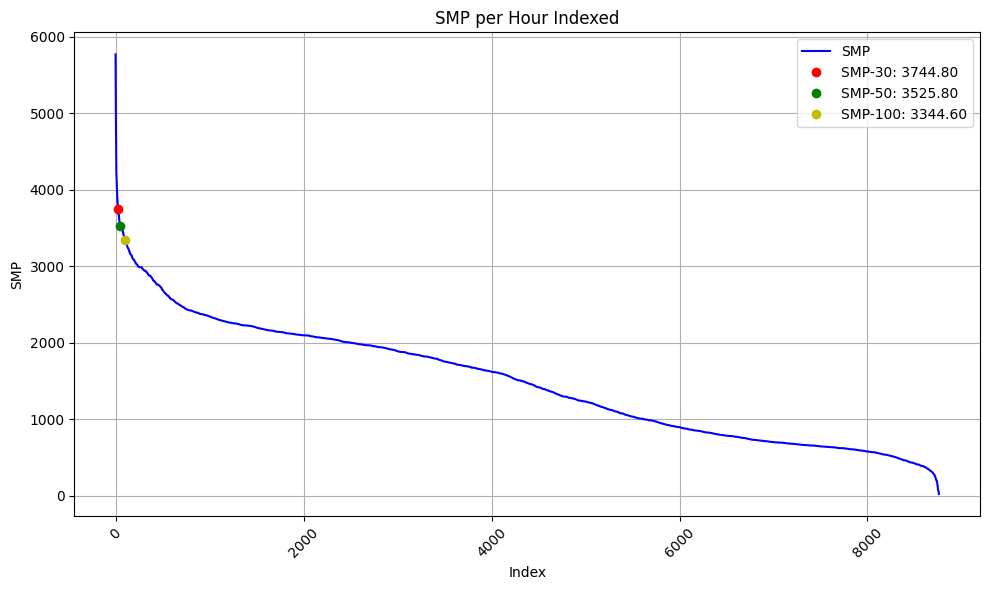

In [35]:
# Assuming df_k_200 is already sorted by 'SMP'
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the entire SMP data
ax.plot(df_k.index, df_k['SMP'], linestyle='-', color='blue', label='SMP')

# Highlight the 30th, 50th, and 100th highest volumes
k30_point = ax.plot(29, df_k.iloc[29]['SMP'], 'ro', label=f'SMP-30: {df_k.iloc[29]["SMP"]:.2f}')
k50_point = ax.plot(49, df_k.iloc[49]['SMP'], 'go', label=f'SMP-50: {df_k.iloc[49]["SMP"]:.2f}')
k100_point = ax.plot(99, df_k.iloc[99]['SMP'], 'yo', label=f'SMP-100: {df_k.iloc[99]["SMP"]:.2f}')

# Setting plot titles and labels
ax.set_title('SMP per Hour Indexed')
ax.set_xlabel('Index')
ax.set_ylabel('SMP')
ax.grid(True)

# Adding legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Balonggandu/2023/8_smp_hour_sort_' + file + '.png')
plt.show()

In [36]:
df_k_200 = df_k.head(200)

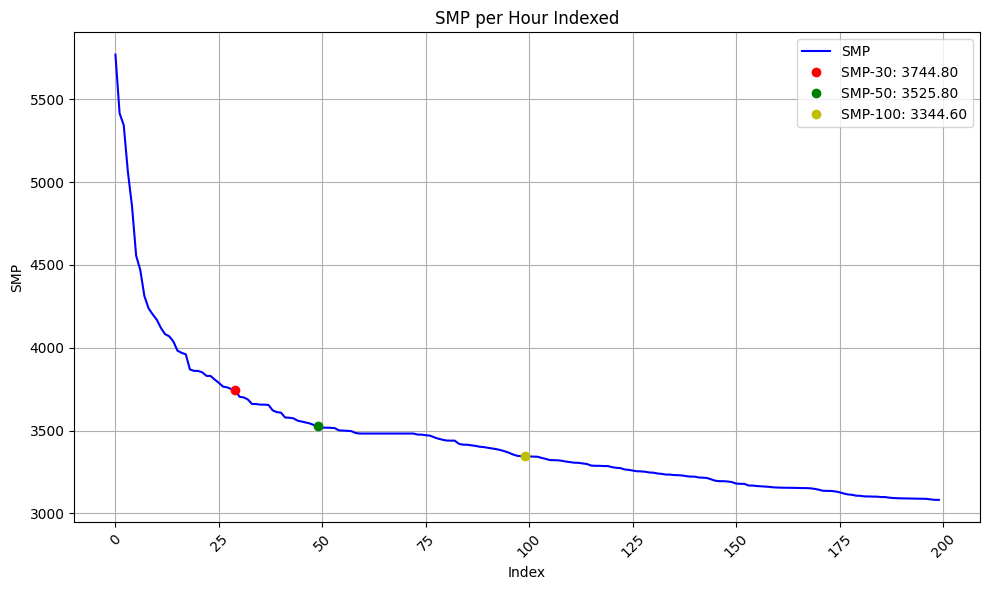

In [37]:
# Assuming df_k_200 is already sorted by 'SMP'
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the entire SMP data
ax.plot(df_k_200.index, df_k_200['SMP'], linestyle='-', color='blue', label='SMP')

# Highlight the 30th, 50th, and 100th highest volumes
k30_point = ax.plot(29, df_k_200.iloc[29]['SMP'], 'ro', label=f'SMP-30: {df_k_200.iloc[29]["SMP"]:.2f}')
k50_point = ax.plot(49, df_k_200.iloc[49]['SMP'], 'go', label=f'SMP-50: {df_k_200.iloc[49]["SMP"]:.2f}')
k100_point = ax.plot(99, df_k_200.iloc[99]['SMP'], 'yo', label=f'SMP-100: {df_k_200.iloc[99]["SMP"]:.2f}')

# Setting plot titles and labels
ax.set_title('SMP per Hour Indexed')
ax.set_xlabel('Index')
ax.set_ylabel('SMP')
ax.grid(True)

# Adding legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Balonggandu/2023/8_smp_hour_sort_200_' + file + '.png')
plt.show()


In [38]:
faktor_k = {}

# Assuming df_k is sorted by 'SMP' in descending order and AADT is predefined
K_30 = (df_k.loc[29, 'SMP'] / aadt) * 100  # Accessing the 30th highest value
K_50 = (df_k.loc[49, 'SMP'] / aadt) * 100  # Accessing the 50th highest value
K_100 = (df_k.loc[99, 'SMP'] / aadt) * 100  # Accessing the 100th highest value

faktor_k['K-30'] = f"{K_30:.2f}%"
faktor_k['K-50'] = f"{K_50:.2f}%"
faktor_k['K-100'] = f"{K_100:.2f}%"

# Mengubah dictionary menjadi DataFrame
faktor_k_df = pd.DataFrame(list(faktor_k.items()), columns=['K', 'Factor'])

In [39]:
faktor_k_df.head()

,K,Factor
0,K-30,10.49%
1,K-50,9.87%
2,K-100,9.36%


In [40]:
faktor_k_df.to_excel('../Data/Preprocessing/' + path + '/8_faktor_k_' + file + '.xlsx', index=False)

# Menghitung Proporsi Harian Terhadap Tahunan

In [41]:
df_pro_hari_thn = df_smp_hari.copy()
df_pro_hari_thn['PRO_HARI_THN'] = df_pro_hari_thn['SMP']/aadt
df_pro_hari_thn = df_pro_hari_thn[['TAHUN','BULAN','TANGGAL','SMP','PRO_HARI_THN']]

In [42]:
df_pro_hari_thn.head()

,TAHUN,BULAN,TANGGAL,SMP,PRO_HARI_THN
0,2023,1,1,40514.3,1.134393
1,2023,1,2,53056.6,1.485575
2,2023,1,3,46817.8,1.310889
3,2023,1,4,43645.5,1.222066
4,2023,1,5,42345.4,1.185663


In [43]:
df_pro_hari_thn.to_excel('../Data/Preprocessing/' + path + '/8_pro_hari_thn_' + file + '.xlsx', index=False)

# Menghitung Proporsi Harian Terhadap Bulanan

In [44]:
data_gabungan = pd.merge(aadts_df[['BULAN','LHR_BLN']], df_smp_hari, on=['BULAN'])

In [45]:
data_gabungan = data_gabungan[['TAHUN', 'BULAN','TANGGAL','HARI','SMP','LHR_BLN']]

In [46]:
data_gabungan['PRO_HARI_BLN'] = data_gabungan['SMP']/aadt

In [47]:
data_gabungan.head()

,TAHUN,BULAN,TANGGAL,HARI,SMP,LHR_BLN,PRO_HARI_BLN
0,2023,1,1,Sunday,40514.3,39793.822143,1.134393
1,2023,1,2,Monday,53056.6,39793.822143,1.485575
2,2023,1,3,Tuesday,46817.8,39793.822143,1.310889
3,2023,1,4,Wednesday,43645.5,39793.822143,1.222066
4,2023,1,5,Thursday,42345.4,39793.822143,1.185663


In [48]:
data_gabungan.to_excel('../Data/Preprocessing/' + path + '/8_pro_hari_bln_' + file + '.xlsx', index=False)

# Menghitung Proporsi Bulanan Terhadap Tahunan

In [49]:
df_pro_bul_thn = df_smp_bln.copy()
df_pro_bul_thn['PRO_BLN_THN'] = df_smp_bln['LHR_BLN']/aadt
df_pro_bul_thn = df_pro_bul_thn[['TAHUN','BULAN','LHR_BLN','PRO_BLN_THN']]

In [50]:
df_pro_bul_thn.head(12)

,TAHUN,BULAN,LHR_BLN,PRO_BLN_THN
0,2023,1,39899.938710,1.117191
1,2023,2,37304.307143,1.044513
2,2023,3,36329.764516,1.017226
3,2023,4,35955.313333,1.006742
4,2023,5,40476.283871,1.133328
5,2023,6,33592.703333,0.940589
6,2023,7,35059.358065,0.981655
7,2023,8,26205.183871,0.733740
8,2023,9,35746.580000,1.000897
9,2023,10,36418.767742,1.019718


In [51]:
df_pro_bul_thn.to_excel('../Data/Preprocessing/' + path + '/8_pro_bln_thn_' + file + '.xlsx', index=False)